In [ ]:
!pip3 install pillow

In [ ]:
!pip3 install matplotlib

In [ ]:
!pip3 install tf-nightly

In [ ]:
!pip3 freeze > requirements.txt

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.8.0-dev20211113


In [19]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True)
training_set = train_datagen.flow_from_directory(
                'training_data',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 3488 images belonging to 5 classes.


In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)
testing_set = test_datagen.flow_from_directory('testing_data',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 222 images belonging to 5 classes.


In [21]:
cnn = tf.keras.models.Sequential()

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [26]:
cnn.add(tf.keras.layers.Flatten())

In [27]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [28]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [29]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [30]:
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [31]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history = cnn.fit(training_set,
                    validation_data=testing_set,
                    epochs=32)

Epoch 1/32
109/109 [==============================] - 23s 207ms/step - loss: 1.3966 - accuracy: 0.3804 - val_loss: 1.1327 - val_accuracy: 0.5405
Epoch 2/32
109/109 [==============================] - 23s 212ms/step - loss: 1.2024 - accuracy: 0.4903 - val_loss: 1.1114 - val_accuracy: 0.5541
Epoch 3/32
109/109 [==============================] - 21s 195ms/step - loss: 1.1201 - accuracy: 0.5358 - val_loss: 0.9398 - val_accuracy: 0.6622
Epoch 4/32
109/109 [==============================] - 21s 195ms/step - loss: 1.0313 - accuracy: 0.5958 - val_loss: 0.9183 - val_accuracy: 0.6306
Epoch 5/32
109/109 [==============================] - 22s 198ms/step - loss: 0.9875 - accuracy: 0.6095 - val_loss: 0.8984 - val_accuracy: 0.6757
Epoch 6/32
109/109 [==============================] - 22s 200ms/step - loss: 0.9413 - accuracy: 0.6273 - val_loss: 0.9595 - val_accuracy: 0.6532
Epoch 7/32
109/109 [==============================] - 21s 193ms/step - loss: 0.8750 - accuracy: 0.6568 - val_loss: 1.1251 - val_ac

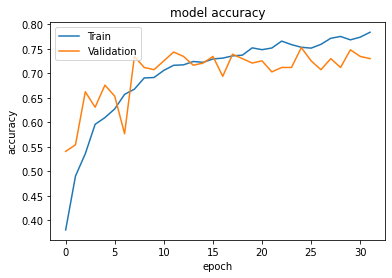

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')

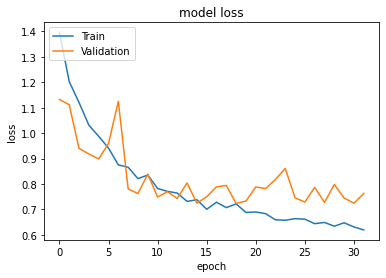

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('prediction/daisy.jpeg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
training_set.class_indices

In [ ]:
print(result)

In [ ]:
MODEL_NAME = 'FlowerModel.h5'

In [ ]:
cnn.save(MODEL_NAME)

In [ ]:
cnn.summary()

In [ ]:
TF_LITE_MODEL_NAME = 'FlowerModelV4.tflite'

In [ ]:
model = tf.keras.models.load_model(MODEL_NAME)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

In [ ]:
tflite_model = converter.convert()

In [ ]:
tfl_model_name = TF_LITE_MODEL_NAME
open(tfl_model_name,'wb').write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path=TF_LITE_MODEL_NAME)
interpreter.allocate_tensors()

In [ ]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [ ]:
print(input_index)
print(output_index)

In [ ]:
import tensorboard

In [ ]:
%tensorboard --logdir logs

In [ ]:
yes